In [1]:
cd("/Users/elfflorin/Documents/Projects/julia.hw/jpie");
using Lexicon;
using brml;


Available Demos:

demoBurglar.jl
demoBurglarDictPot.jl
demoBurglarSimple.jl
demoChainIndepRational.jl
demoHMMInferenceFG.jl
demoHMMInferenceSimple.jl
demoHMMlearn.jl
demoMaxProd.jl
demoPlotDAG.jl
demoPotLogArray.jl
demoSumProd.jl
demoSumProdStandardiseVariables.jl


INFO: Loading help data...


The domain for visible states: $V = \{1, 2, 3, 4, 5\}$  <br/>
The domain for hidden states: $H = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$ <br/>
The number of timesteps: $T = 20$

In [17]:
V = 5  # number of visible states
H = 10 # number of hidden states
T = 20 # number of timesteps

20

Initialize the time-series vectors **h, v** for the hidden and visible variables

In [3]:
h = zeros(Int64,1,T) # holds the state value for the hidden variable at a specific timestep
v = zeros(Int64,1,T) # holds the state value for the visible variable at a specific timestep

1x20 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

The probabilities for the hidden variable states at timestep 1: $p(h_{1})$ 

In [4]:
ph1 = condp(rand(H,1)) # probabilities for the states of the hidden variable at timestep 1

10x1 Array{Float64,2}:
 0.0521677
 0.0533665
 0.175184 
 0.0878741
 0.0595795
 0.0717847
 0.0986391
 0.206537 
 0.0487324
 0.146135 

Initialize the transition matrix **$phghm_{10x10}$** with
$$\begin{eqnarray}
  phghm(i, j) = p(h_t = i | h_{t-1} = j) \\
  \sum_{i = 1}^{10} phghm(i, j) = 1
 \end{eqnarray}
$$

In [5]:
phghm=condp(eye(H,H)) # transition matrix with sum(phghm, 1) = 1 with phghm[i, j] = p(hg=i | hm=j), hg @t, hm @t-1
# shuffle the column data in phghm while keeping sum(phghm, 1) = 1
# done as below no 2 columns have value 1.0 on the same row
phghmtmp=condp(eye(H,H))
r = randperm(H)
for (i, value) in enumerate(r)
    phghm[:, i] = phghmtmp[:, value]
end
phghm

10x10 Array{Float64,2}:
 2.22507e-308  2.22507e-308  2.22507e-308  …  2.22507e-308  2.22507e-308
 2.22507e-308  1.0           2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     1.0           2.22507e-308
 2.22507e-308  2.22507e-308  1.0              2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 1.0           2.22507e-308  2.22507e-308  …  2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  1.0         
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308
 2.22507e-308  2.22507e-308  2.22507e-308     2.22507e-308  2.22507e-308

Initialize the emission matrix **$pvgh \in R^{5x10}$** with
$$\begin{eqnarray}
  pvgh(i, j) = p(v_t = i | h_{t} = j) \\
  \sum_{i = 1}^{5} pvgh(i, j) = 1
 \end{eqnarray}
$$

In [6]:
pvgh=condp((rand(V,H))) # emision matrix with sum(pvgh, 1) = 1 with pvgh[i, j] = p(vg = i | h = j), vg, h @ t

5x10 Array{Float64,2}:
 0.359977   0.0494751  0.350491  0.0844838  …  0.142234   0.095741  0.175814 
 0.163257   0.0340671  0.140025  0.102918      0.315819   0.269041  0.32263  
 0.310087   0.196719   0.290668  0.330373      0.0643657  0.269051  0.13493  
 0.0636661  0.360367   0.107509  0.416339      0.244638   0.184172  0.268939 
 0.103012   0.359372   0.111308  0.0658863     0.232944   0.181995  0.0976883

In [7]:
h[1]=randgen(ph1) # initialize the hidden variable @t=1 with a random state based on ph1 distribution
v[1]=randgen(pvgh[:,h[1]]) # initialize the visible variable @t=1 with a random state based on pvgh( vg | h@t=1)

for t=2:T
    h[t]=randgen(phghm[:,h[t-1]]) # set the hidden variable state @t based on h@t-1 using the transition matrix
    v[t]=randgen(pvgh[:,h[t]]) # set the visible variable state @t based on h@t using the emission matrix
end

In [8]:
(alpha, loglik) = HMMforward(v, phghm, ph1, pvgh); # filtering
println("Log Likelihood = $loglik")

Log Likelihood = -32.57227509471336


In [9]:
gamma = HMMsmooth(v, phghm, ph1, pvgh, alpha); # smoothing

10x20 Array{Float64,2}:
 0.0126897    0.1381       0.000348185  …  0.0126897    0.1381     
 0.000150879  0.000150879  0.000150879     0.000150879  0.000150879
 0.667196     0.0175462    9.58719e-5      0.667196     0.0175462  
 0.000348185  0.667196     0.0175462       0.000348185  0.667196   
 0.0235316    0.0235316    0.0235316       0.0235316    0.0235316  
 9.58719e-5   0.0126897    0.1381       …  9.58719e-5   0.0126897  
 0.0366093    0.103732     0.0366093       0.0366093    0.103732   
 0.1381       0.000348185  0.667196        0.1381       0.000348185
 0.0175462    9.58719e-5   0.0126897       0.0175462    9.58719e-5 
 0.103732     0.0366093    0.103732        0.103732     0.0366093  

In [10]:
(maxstate, logprob) = HMMviterbi(v, phghm, ph1, pvgh)
println("most likely path (viterbi):")
println(maxstate)

most likely path (viterbi):
[3 4 8 1 6 9 3 4 8 1 6 9 3 4 8 1 6 9 3 4]


In [11]:
println("original path (hidden states):")
println(h)

original path (hidden states):
[3 4 8 1 6 9 3 4 8 1 6 9 3 4 8 1 6 9 3 4]


In [12]:
println("original path (visible states):")
println(v)

original path (visible states):
[5 2 4 5 5 2 2 3 5 3 3 3 2 3 2 4 3 3 1 4]


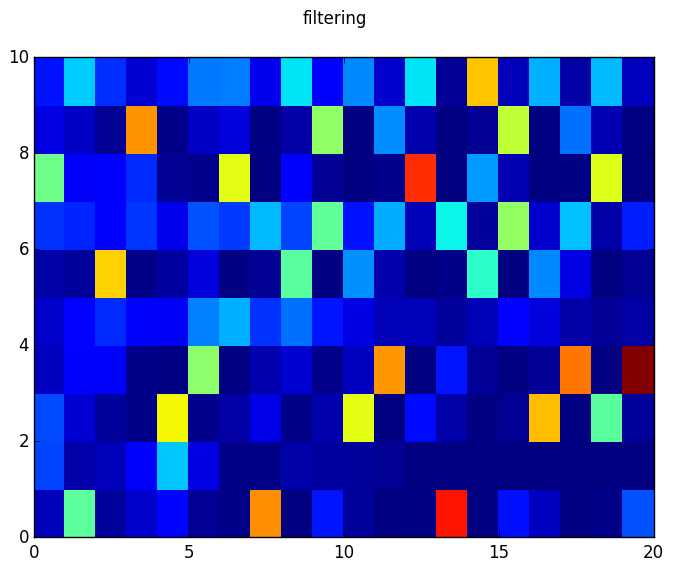

Figure(PyObject <matplotlib.figure.Figure object at 0x113345110>)

In [13]:
PyPlot.pcolor(alpha); PyPlot.suptitle("filtering")
PyPlot.figure()

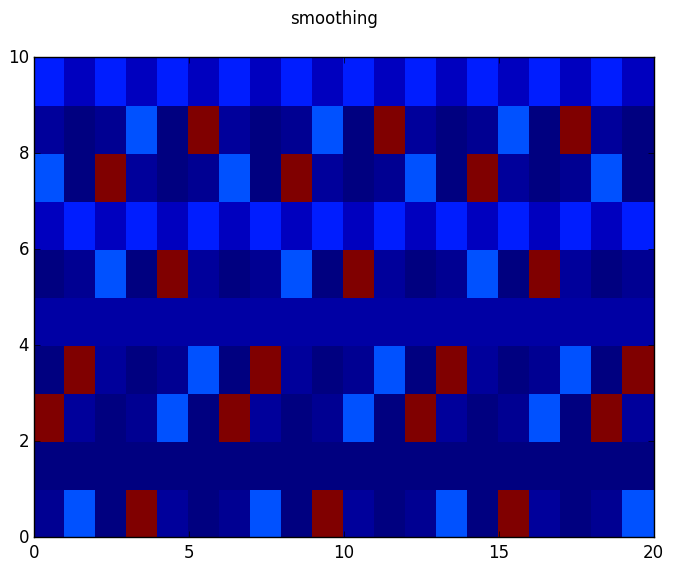

PyObject <matplotlib.text.Text object at 0x10c956790>

In [14]:
PyPlot.pcolor(gamma); PyPlot.suptitle("smoothing")

In [15]:
gamma

10x20 Array{Float64,2}:
 0.0126897    0.1381       0.000348185  …  0.0126897    0.1381     
 0.000150879  0.000150879  0.000150879     0.000150879  0.000150879
 0.667196     0.0175462    9.58719e-5      0.667196     0.0175462  
 0.000348185  0.667196     0.0175462       0.000348185  0.667196   
 0.0235316    0.0235316    0.0235316       0.0235316    0.0235316  
 9.58719e-5   0.0126897    0.1381       …  9.58719e-5   0.0126897  
 0.0366093    0.103732     0.0366093       0.0366093    0.103732   
 0.1381       0.000348185  0.667196        0.1381       0.000348185
 0.0175462    9.58719e-5   0.0126897       0.0175462    9.58719e-5 
 0.103732     0.0366093    0.103732        0.103732     0.0366093  

In [16]:
help(PyPlot)

Symbol not found. Falling back on apropos search ...


Plot the autocorrelation of `x`.

Create a pseudocolor plot of a 2-D array.
Draw contours on an unstructured triangular grid.
Plot a quadrilateral mesh.
Set the current rc params.  Group is the grouping for the rc, e.g.,
Plot the sparsity pattern on a 2-D array.


Make a plot with log scaling on the *x* axis.
Draw contours on an unstructured triangular grid.


Read an image from a file into an array.
Connect event with string *s* to *func*.  The signature of *func* is::
Make a plot with log scaling on both the *x* and *y* axis.
Add text to figure.

Plot filled polygons.

Plot contours.

Plot with data with dates.
Base.linreg(x, y) -> [a; b]
Base.linreg(x, y, w)

Plot contours.
Make a step plot.

Plot a histogram.

